In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix

In [2]:
df=pd.read_csv("C:/Users/91866/OneDrive/Desktop/ML LAB/Disease prediction ML project/heart disease dataset.csv")             #reading the dataset
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [3]:
df.info()                                                                    #information about the columns of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [4]:
df.describe().T                                                              # basic descriptive statistics of the columns

,count,mean,std,min,25%,50%,75%,max
age,1190.0,53.720168,9.358203,28.0,47.0,54.0,60.00,77.0
sex,1190.0,0.763866,0.424884,0.0,1.0,1.0,1.00,1.0
chest pain type,1190.0,3.232773,0.935480,1.0,3.0,4.0,4.00,4.0
resting bp s,1190.0,132.153782,18.368823,0.0,120.0,130.0,140.00,200.0
cholesterol,1190.0,210.363866,101.420489,0.0,188.0,229.0,269.75,603.0
fasting blood sugar,1190.0,0.213445,0.409912,0.0,0.0,0.0,0.00,1.0
resting ecg,1190.0,0.698319,0.870359,0.0,0.0,0.0,2.00,2.0
max heart rate,1190.0,139.732773,25.517636,60.0,121.0,140.5,160.00,202.0
exercise angina,1190.0,0.387395,0.487360,0.0,0.0,0.0,1.00,1.0
oldpeak,1190.0,0.922773,1.086337,-2.6,0.0,0.6,1.60,6.2


# Basic data pre-processing

In [5]:
df['cholesterol']=df['cholesterol'].replace(0,int(df['cholesterol'].mean()))                     #replacing zeroes present in the cholesterol and resting blood pressure columns with the mean and ST slope with median
df['resting bp s']=df['resting bp s'].replace(0,int(df['resting bp s'].mean()))
df['ST slope']=df['ST slope'].replace(0,int(df['ST slope'].mode()))

In [6]:
#one-hot encoding on variables such as chest pain type, resting ecg and ST slope
chest_pain = pd.get_dummies(df['chest pain type'], prefix='chest pain type')
resting_ecg = pd.get_dummies(df['resting ecg'], prefix='resting ecg ')
slope = pd.get_dummies(df['ST slope'], prefix='ST slope')
dummy_var=[df,chest_pain,resting_ecg,slope]
df=pd.concat(dummy_var,axis=1)                                               #concatenating the encoded columns to the original dataframe and reading the data

df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,...,chest pain type_1,chest pain type_2,chest pain type_3,chest pain type_4,resting ecg _0,resting ecg _1,resting ecg _2,ST slope_1,ST slope_2,ST slope_3
0,40,1,2,140,289,0,0,172,0,0.0,...,0,1,0,0,1,0,0,1,0,0
1,49,0,3,160,180,0,0,156,0,1.0,...,0,0,1,0,1,0,0,0,1,0
2,37,1,2,130,283,0,1,98,0,0.0,...,0,1,0,0,0,1,0,1,0,0
3,48,0,4,138,214,0,0,108,1,1.5,...,0,0,0,1,1,0,0,0,1,0
4,54,1,3,150,195,0,0,122,0,0.0,...,0,0,1,0,1,0,0,1,0,0


Chest pain type, resting ecg and ST slope represent are columns containing categorical data, they contain nominal or label values. This can act as a constarint for efficient implementation of the models, thus one hot encoding is used

In [7]:
df=df.drop(columns=['chest pain type','resting ecg','ST slope'])                            #dropping the columns that are not required anymore
df.head()                                                                   

,age,sex,resting bp s,cholesterol,fasting blood sugar,max heart rate,exercise angina,oldpeak,target,chest pain type_1,chest pain type_2,chest pain type_3,chest pain type_4,resting ecg _0,resting ecg _1,resting ecg _2,ST slope_1,ST slope_2,ST slope_3
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,1,0,0,1,0,0
1,49,0,160,180,0,156,0,1.0,1,0,0,1,0,1,0,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,0,1,0,1,0,0
3,48,0,138,214,0,108,1,1.5,1,0,0,0,1,1,0,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,0,1,0,1,0,0,1,0,0


In [8]:
#separating the dependent and independent features
x=df.drop(['target'],axis=1)                    
#predictor variables  

y=df['target']
#response variable

In [9]:
x = MinMaxScaler().fit_transform(x)                                 #transform features by scaling each feature to a given range.

Data normalization is performed to normalize the range of the predictor variables. Min-max normalization is used.This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.This transformation is often used as an alternative to zero mean, unit variance scaling.

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)                            #splitting the data into training and testing sets with an 80% and 20% ratio respectively

# Implementation of Support vector machine (SVM)

In [11]:
#applying support vector classification
SVM=SVC(kernel='linear', max_iter=10000, C=10, probability=True)
SVM.fit(x_train,y_train)

y_pred=SVM.predict(x_test)

In [12]:
#calculating the accuracy of the SVM classifier
SVM_acc=accuracy_score(y_pred, y_test)
print("Accuracy of support vector machine:",SVM_acc*100)

#printing the classification report
print("   Classification Report   ")
print(classification_report(y_test,y_pred))

Accuracy of support vector machine: 83.61344537815127
   Classification Report   
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       113
           1       0.84      0.85      0.84       125

    accuracy                           0.84       238
   macro avg       0.84      0.84      0.84       238
weighted avg       0.84      0.84      0.84       238



The accuracy of the SVM classifier is almost approximately 84%.
Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class, it is defined as the ratio of true positives to the sum of a true positive and false positive.
Class 1 has a higher precision than 0

The measure recall means "how many of this class you find over the whole number of element of this class",
again class 1 has a higher recall value

The f1-score is the harmonic mean between precision & recall.
Class 1 has a higher f1 score



In [13]:
metrics.confusion_matrix(y_test, y_pred)

array([[ 93,  20],
       [ 19, 106]], dtype=int64)

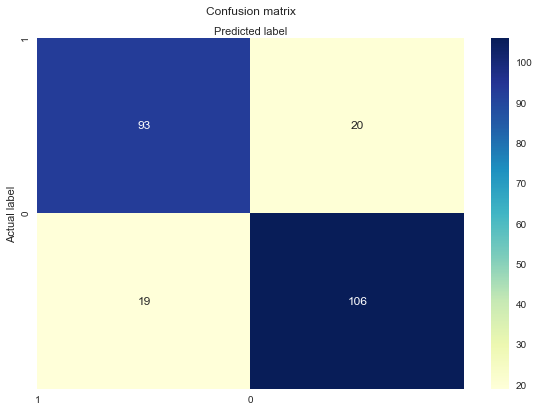

In [14]:
#plotting the confusion matrix

class_names=[1,0] # name  of classes
fig, ax = plt.subplots()
# create heatmap
sns.heatmap(metrics.confusion_matrix(y_test, y_pred),annot=True,cmap='YlGnBu', fmt='g')
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.05)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

A confusion matrix is a performance measurement for machine learning classification problem where output can be two or more classes. 

 93 indicates that 93 psoitive data points were correctly classified by the model.
 106 indicates that 106 negative data points were correctly classified by the model.
20 negative class data points were incorrectly classified as belonging to positive class.
19 positive class data points were incorrectly classified as belonging to the negative class.
 


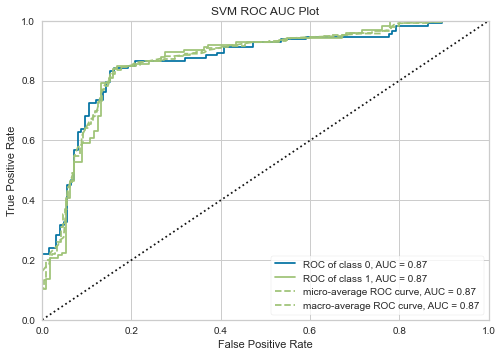

In [21]:
svmrocauc = ROCAUC(SVM, classes=['0', '1'],
                   title='SVM ROC AUC Plot')
svmrocauc.fit(x_train, y_train)
svmrocauc.score(x_test, y_test)
svmrocauc.finalize()

AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes.The ideal point of ROC is therefore the top-left corner of the plot: false positives are zero and true positives are one.
Thus, the model has a pretty good ROC curve

The higher the AUC, the better the model generally is.
The AUC values are pretty high which means that the model is pretty good.

# Implementation of Random Forest classifier

In [16]:
Random_forest= RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=20, min_samples_split=15)

Random_forest.fit(x_train, y_train)
y_pred_Random = Random_forest.predict(x_test)

In [17]:
Random_acc=accuracy_score(y_pred_Random, y_test)
print("Accuracy of random forest classifier:",Random_acc*100)

print("    *Classification Report*     ")
print(classification_report(y_test,y_pred_Random))

Accuracy of random forest classifier: 81.9327731092437
    *Classification Report*     
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       113
           1       0.83      0.82      0.83       125

    accuracy                           0.82       238
   macro avg       0.82      0.82      0.82       238
weighted avg       0.82      0.82      0.82       238



The accuracy of the random forest classifier is about 82%. Class 1 has a higher precision rate than Class 0. Similarly recall and f1 score of class 1 is seen to be higher.

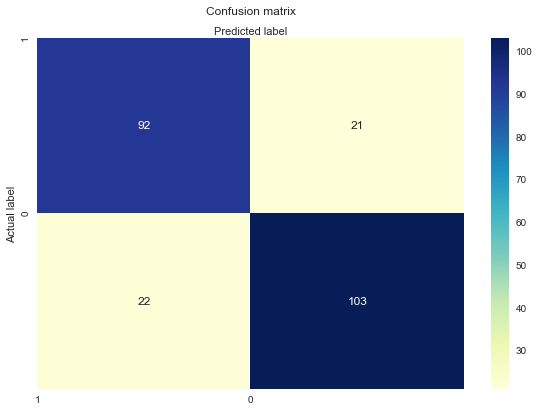

In [18]:
class_names=[1,0] # name  of classes
fig, ax = plt.subplots()
# create heatmap
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_Random),annot=True,cmap='YlGnBu', fmt='g')
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.05)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

92 indicates that 92 psoitive data points were correctly classified by the model. 103 indicates that 103 negative data points were correctly classified by the model. 21 negative class data points were incorrectly classified as belonging to positive class. 22 positive class data points were incorrectly classified as belonging to the negative class.

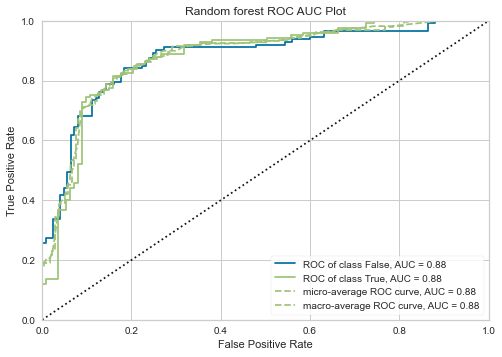

In [19]:
svmrocauc = ROCAUC(Random_forest, classes=['False', 'True'],
                   title='Random forest ROC AUC Plot')
svmrocauc.fit(x_train, y_train)
svmrocauc.score(x_test, y_test)
svmrocauc.finalize()

AUC - ROC curve tells how much the model is capable of distinguishing between classes.The ideal point of ROC is therefore the top-left corner of the plot: false positives are zero and true positives are one. Thus, the model has a pretty good ROC curve

The higher the AUC, the better the model generally is. The AUC values are pretty high which means that the model is pretty good.